<class 'int'>
Total No. of Peoples: 500
Total No. of Males: 245
Total No. of Females: 255
Percentage of Males: 49.0%
Percentage of Females:51.0%
     Gender Height_m  Weight_kg      BMI  Index           Status
1      Male     1.74         96  31.7083      4          Obesity
2      Male     1.89         87  24.3554      2           Normal
3    Female     1.85        110  32.1402      4          Obesity
4    Female     1.95        104  27.3504      3       Overweight
5      Male     1.49         61  27.4762      3       Overweight
6      Male     1.89        104  29.1145      3       Overweight
7      Male     1.47         92  42.5749      5  Extreme Obesity
8      Male     1.54        111  46.8038      5  Extreme Obesity
9      Male     1.74         90  29.7265      3       Overweight
10   Female     1.69        103  36.0632      4          Obesity
11     Male     1.95         81  21.3018      2           Normal
12   Female     1.59         80  31.6443      4          Obesity
13   Femal

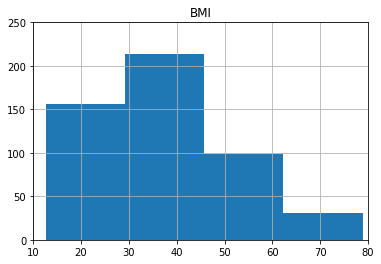

In [8]:
import MySQLdb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# to open a database connection
db = MySQLdb.connect("localhost","root","8881","bmi")
cursor = db.cursor()
sql1 = "select * from data"
People = "select count(Gender) from data"
no_male = "select count(Gender) from data where Gender = 'Male'"
no_female = "select count(Gender) from data where Gender = 'Female'"
cursor.execute(sql1)
result1 = cursor.fetchall()
cursor.execute(People)
e = (cursor.fetchone()[0])
print(type(e))
print("Total No. of Peoples:", e)
cursor.execute(no_male)
no_males = float((cursor.fetchone()[0]))
print("Total No. of Males:", int(no_males))
cursor.execute(no_female)
no_females = float((cursor.fetchone()[0]))
print("Total No. of Females:", int(no_females))
prt_m = ((no_males/float(e))*100)
print("Percentage of Males: " + str(prt_m) + "%")
prt_f = ((no_females/float(e))*100)
print("Percentage of Females:" + str(prt_f) + "%")
index = [int(i) for i in range(1,501)]
df = pd.DataFrame(list(result1), index = index)
df.columns = ['Gender','Height_m','Weight_kg','BMI','Index']
a=df
#if any missing value occur
a.isnull().any()
def convert_status_to_description(x):
    if x['Index'] == 0:
        return 'Extremely Weak'
    elif x['Index'] == 1:
        return 'Weak'
    elif x['Index'] == 2:
        return 'Normal'
    elif x['Index'] == 3:
        return 'Overweight'
    elif x['Index']== 4:
        return 'Obesity'
    elif x['Index'] == 5:
        return 'Extreme Obesity'
a['Status'] = a.apply(convert_status_to_description,axis=1)
print(a)

df.hist(column='BMI',bins=4)
plt.axis([10, 80, 0, 250])
plt.savefig('output.jpg')
db.close()
plt.show()

In [9]:
people = a['Gender'].value_counts() 
print(type(people))
people.head()

<class 'pandas.core.series.Series'>


Female    255
Male      245
Name: Gender, dtype: int64

In [10]:
df.shape

(500, 6)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


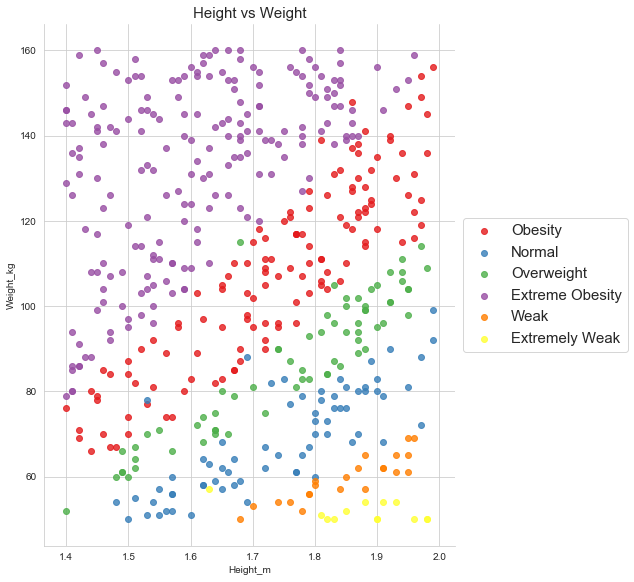

<Figure size 432x288 with 0 Axes>

In [11]:
sns.set_style('whitegrid')
sns.lmplot( x='Height_m', y='Weight_kg', data=a, 
           fit_reg=False, 
           hue='Status', 
           legend=False, 
           palette='Set1',
           size = 8, 
           aspect = 1
          )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})
plt.show()
plt.savefig('output1.png')

In [12]:
categories = a['Status'].value_counts() 
categories

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: Status, dtype: int64

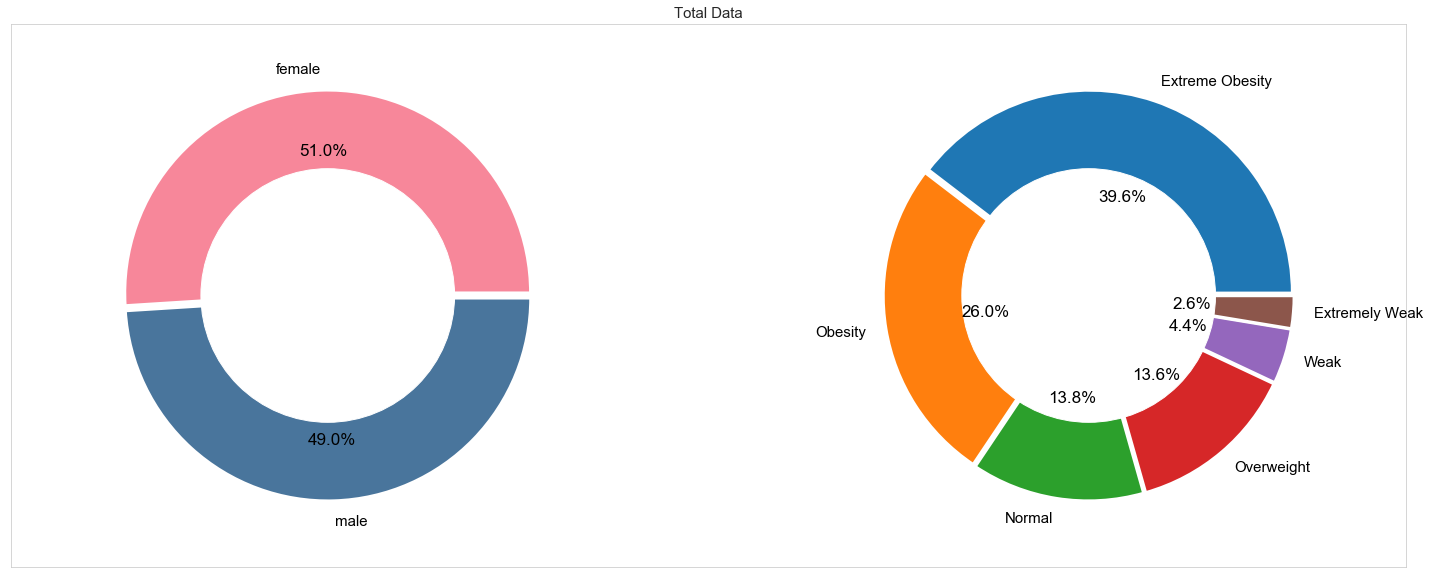

<Figure size 432x288 with 0 Axes>

In [6]:
fig = plt.figure(figsize=(25,10))
plt.title("Total Data",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks
# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,)*(len(people))
wedges, texts, autotexts =  ax1.pie(people,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['female','male'],
                                    colors=['#f7879a','#49759c'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.7,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,)*(len(categories))
wedges2, texts2, autotexts2 =  ax2.pie(categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Normal','Overweight','Weak','Extremely Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
plt.savefig('output2.jpg')

In [17]:
help(plt.title)

NameError: name 'size' is not defined

In [7]:
data_visual_male = a[a['Gender']=='Male']
data_visual_male.head()

,Gender,Height,Weight,BMI,Index,Status
1,Male,1.74,96,31.7083,4,Obesity
2,Male,1.89,87,24.3554,2,Normal
5,Male,1.49,61,27.4762,3,Overweight
6,Male,1.89,104,29.1145,3,Overweight
7,Male,1.47,92,42.5749,5,Extreme Obesity


In [8]:
data_visual_male_categories = data_visual_male['Status'].value_counts()
data_visual_male_categories

Extreme Obesity    105
Obesity             59
Overweight          32
Normal              28
Weak                15
Extremely Weak       6
Name: Status, dtype: int64

In [9]:
data_visual_female = a[a['Gender']=='Female']
data_visual_female.head()

,Gender,Height,Weight,BMI,Index,Status
3,Female,1.85,110,32.1402,4,Obesity
4,Female,1.95,104,27.3504,3,Overweight
10,Female,1.69,103,36.0632,4,Obesity
12,Female,1.59,80,31.6443,4,Obesity
13,Female,1.92,101,27.3980,3,Overweight


In [10]:
data_visual_female_categories = data_visual_female['Status'].value_counts()
data_visual_female_categories

Extreme Obesity    93
Obesity            71
Normal             41
Overweight         36
Extremely Weak      7
Weak                7
Name: Status, dtype: int64

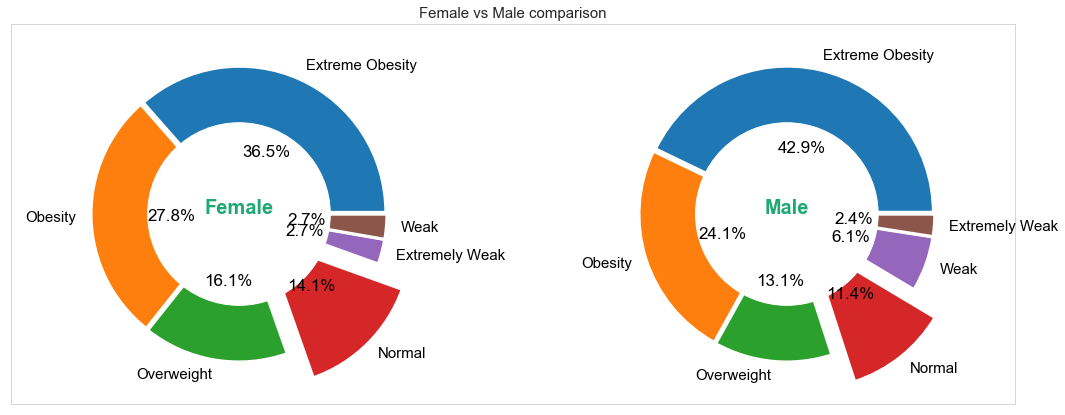

<Figure size 432x288 with 0 Axes>

In [11]:
fig = plt.figure(figsize=(18,7))
plt.title("Female vs Male comparison",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,0.01,0.01,0.2,0.01,0.01)

wedges, texts, autotexts =  ax1.pie(data_visual_female_categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Overweight','Normal','Extremely Weak','Weak'],
                                    autopct="%0.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax1.text(0,0,'Female',size=20,color='#1fa774',horizontalalignment='center',weight='bold')

# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,0.01,0.01,0.2,0.01,0.01)
wedges2, texts2, autotexts2 =  ax2.pie(data_visual_male_categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Overweight','Normal','Weak','Extremely Weak'],
                                    autopct="%0.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax2.text(0,0,'Male',size=20,color='#1fa774',horizontalalignment='center',weight='bold')
plt.show()
plt.savefig('output3.jpg')

In [1]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lbl_enc = LabelEncoder()
data.iloc[:,0] = lbl_enc.fit_transform(e.iloc[:,0])
one_hot_enc_for_gender = OneHotEncoder(categorical_features = [0])
data = one_hot_enc_for_gender.fit_transform(e).toarray()

NameError: name 'data' is not defined

In [ ]:
df = pd.DataFrame(data)
df.head()